# **Algorithmic Trading** 

**Resources** -
Avellaneda, Marco. Algorithmic and High-Frequency Trading. New York: Publisher, 2011.

In the recent years, algorithmic trading has surged as evidenced by the increasing share of orders executed through automated systems. This trend, as depicted by the graph, underscores the growing reliance on high-frequency trading and direct market access (DMA). DMA encourages institutional investors to access the exchange directly without any intermediaries or brokers coming in the way which reduces the additional costs that could be involved while purchasing stocks. High-Touch Orders on the contrary have witnessed a fall over the years. High-Touch Orders are the opposite of automated trading. They are rather more personalized toward the needs of the client and focus on the time, funds left for making a purchase, etc. 

This project is primarily going to serve as an overview of the potential algorithms that could be used to make accurate decisions after which I hope to develop a program that provides the statistics of each company calculated based on historical as well as real-time data. I will be using the above listed reference to implement algorithms and hopefully make an ML model that could learn from past results to make more accurate and precise decisions for all the companies across all the markets. 

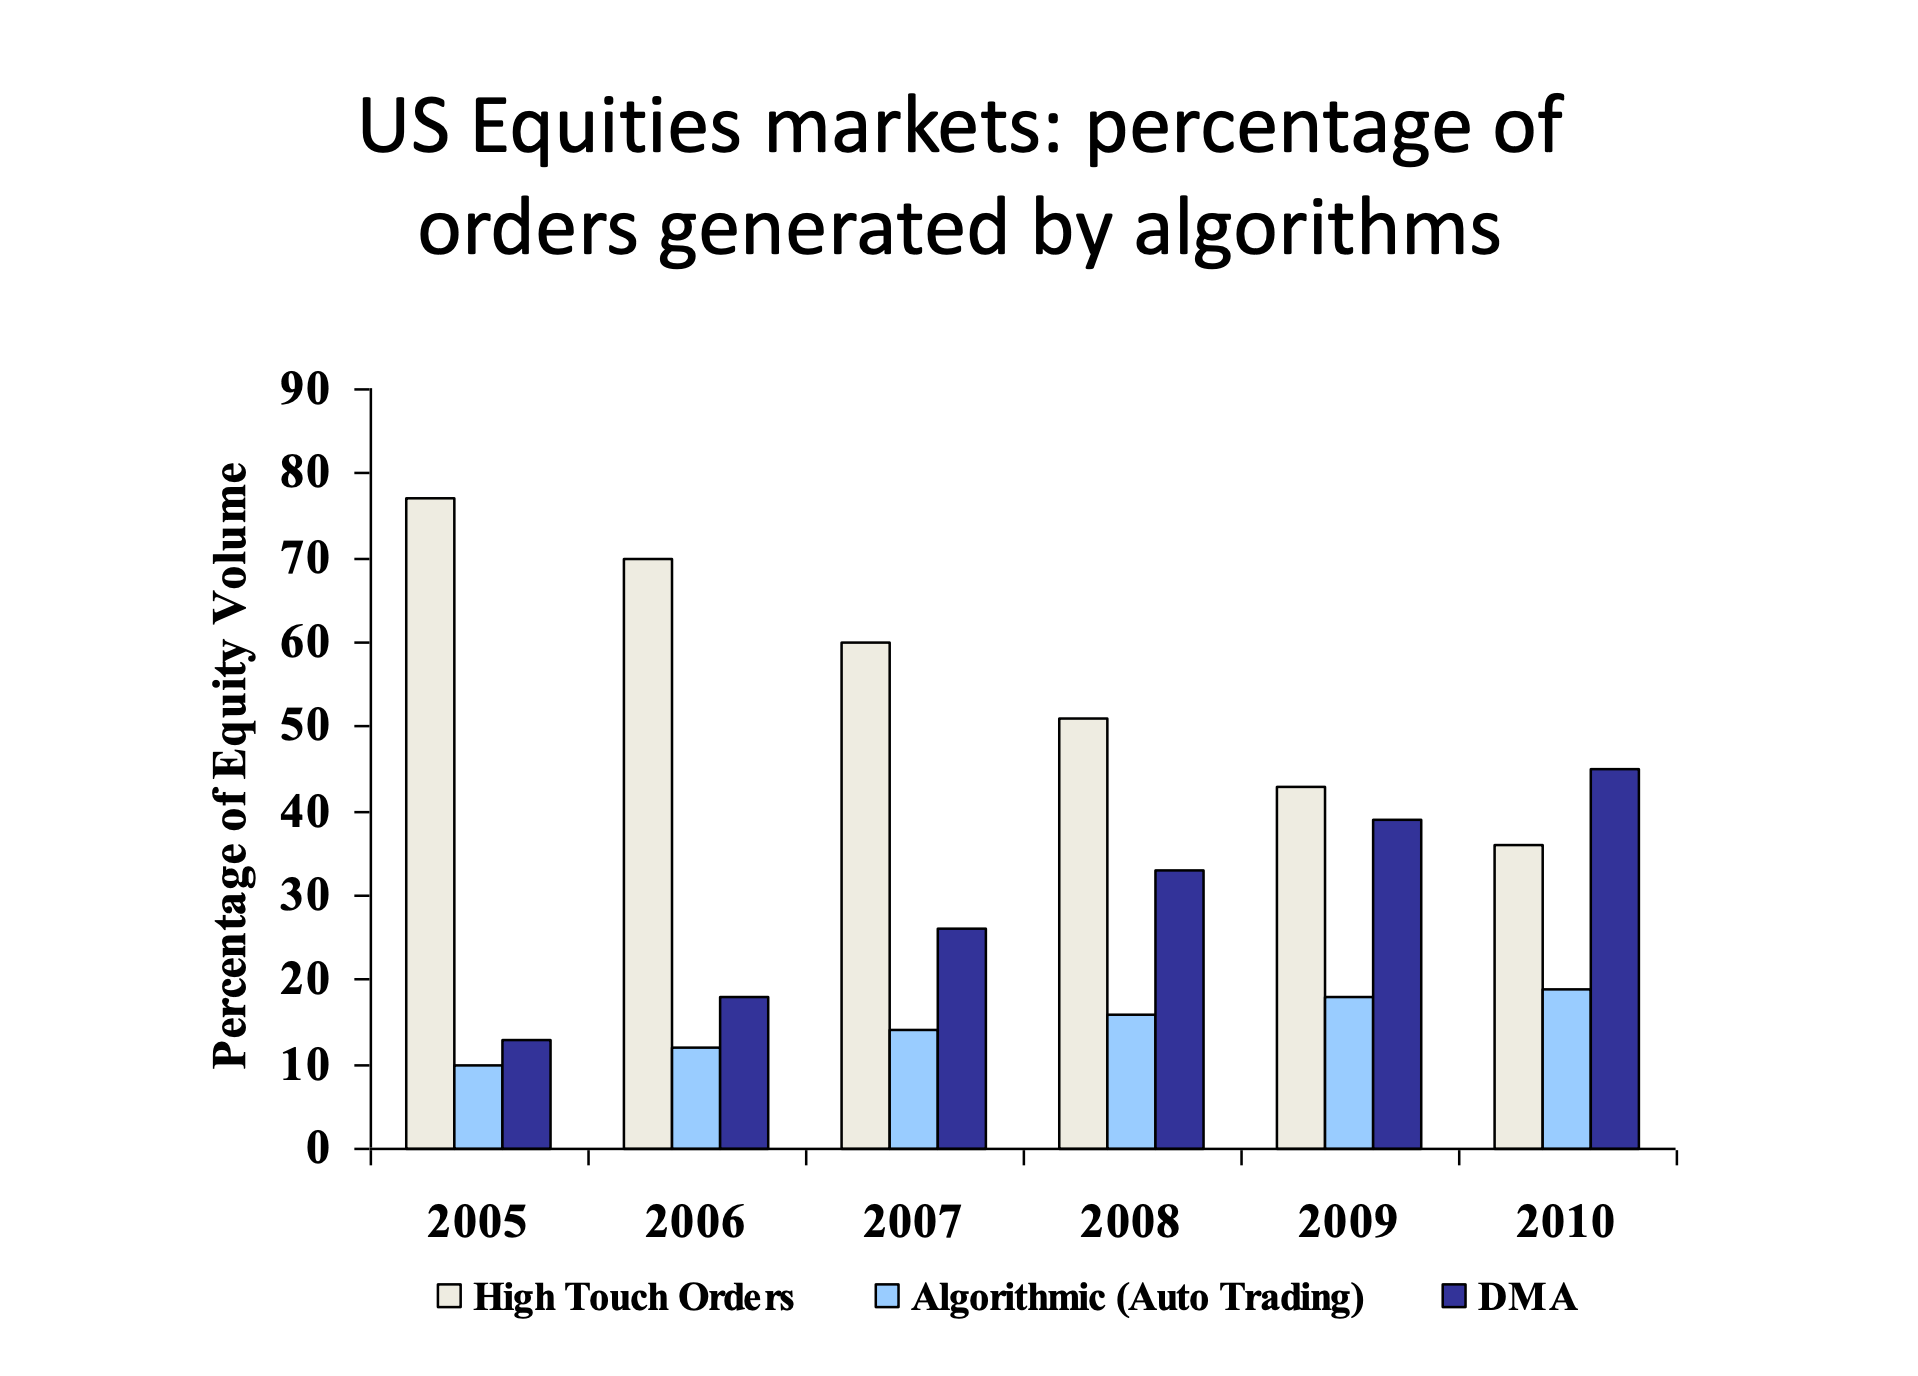


We can use Volume Weighted Average Price (VWAP) as a parameter. The volume change during the course of the day is usually less in the middle. To execute large orders, the way in which we split the orders usually depends on the time of the day (in order to minimize the impact). Looking at the time of the day when splitting huge orders can help reduce the market impact in algorithmic trading by leveraging market conditons and liquidity dynamics.

When there is a large quantity of buyers and sellers, there is generally high liquidity in the market which is the best time to trade in stocks since the abundance of market participants helps absorb large buy and sell orders more effectively. As a result, executing large orders during times of high liquidity periods can substantially reduce the risk of causing significant price movements due to the order itself. 

"High liquidity primarily contributes to market effeciency by facilitating price discovery and further ensuring the asset prices reflect all the available information of the company. Effecient 
markets, with the liquidity being high, enable traders to execute trades at fair prices and further minimize the impact of large transactions on the overall market stability."

# *Thesis Statement*

"This project primarily aims to demonstrate how analyzing the Volume Weighted Average Price (VWAP) and the intraday liquidity patterns can optimize algorithmic trading strategies, reduce market impact, and enhance the trade execution efficiency."

# *Project Overview*

I will be using the Alpha Vantage API to acquire real-time and historical data. This data will be used to backtest our algorithm, which is built on the principles of Volume Weighted Average Price (VWAP) and market liquidity over specific time intervals.

In [1]:
import pandas as pd
import numpy as np
import requests

# My objective for this part is to estimate the average volume that is traded in a five minute interval for a particular company and then find out the number of orders that must be executed in proportion to the normative volume for that particular interval. Volume functions are usually built on the historical data of the company. 

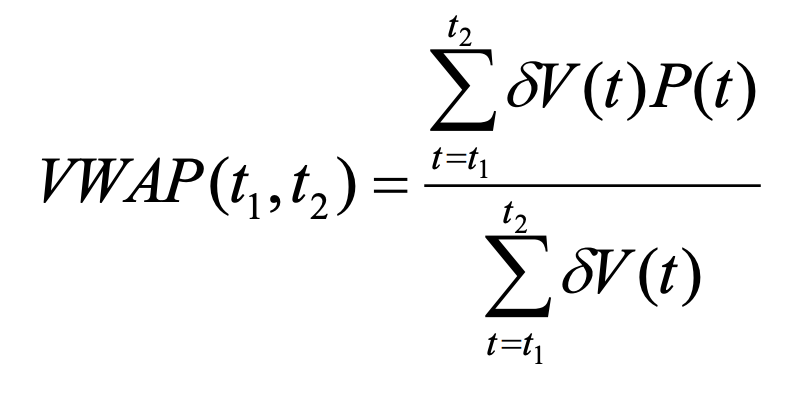

The Volume Weighted Average Price (VWAP), over a given time interval (from t1 to t2), is calculated by taking the summation of the product of the volume and price for each trade during that interval, and then dividing by the total volume traded during the same interval.

# I will be storing the Volume Weighted Average Prices of all the stocks that come under the S&P 500 index in a dataframe and I will be delving further into my hypothesis based on operations conducted on this dataframe

In [2]:
sp_500 = pd.read_csv('sp_500_stocks.csv')

In [3]:
# These are all the tickers for which we will be finding there respective Volume Weighted Average Price
sp_500

,Ticker
0,A
1,AAL
2,AAP
3,AAPL
4,ABBV
...,...
498,YUM
499,ZBH
500,ZBRA
501,ZION


In [4]:

# import requests

# VMAP_df = pd.DataFrame(columns = ['Ticker', 'VMAP'])

# # Alpha Vantage endpoint and the API key for the request
# VWAP_records = []
# for i in range(len(sp_500)):
#     ticker = sp_500['Ticker'][i]
#     base_url = 'https://www.alphavantage.co/query'
#     API_key = 'RDEU4MEC2ORKT5HY'
#     params = {
#         'function': 'VWAP',
#         'symbol': ticker,
#         'interval': '15min',
#         'apikey': API_key
#     }

#     response = requests.get(base_url, params = params)
#     response_json = response.json()
#     # just for testing, I will be extracting the latest Volume Weighted Average Price of all the stocks that come under S&P 500
#     latest_VWAP = list(response_json['Technical Analysis: VWAP'].values())[0]['VWAP']
#     VWAP_records.append({'Ticker': ticker, 'Value Weighted Average Price': latest_VWAP})

# # Converting the records in the form of dictionaries to a dataframe
# VWAP_df = pd.DataFrame(VWAP_records)
# VWAP_df.to_csv('VMAP.csv', index = False)

In [5]:
# I don't want to pay 50 dollars a month for the API key, so I will try using the Yahoo Finance API to get the Volume Weighted Average Price instead. 

# In this section, I will be exploring the Yahoo Finance API to get a rough idea of how to get the Volume Weighted Average Price of a stock.
# The Yahoo_fin library has two options mainly - 1) stock_info module and 2) options module


# downloading historical data of all the tickers in the S&P 500 list using the Yahoo_fin library
%pip install yahoo_fin
from yahoo_fin.stock_info import get_data


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


## Now that we have imported the get_data function from the yahoo_fin.stock_info module, we can use this function to get the historical data of all the stocks in the S&P 500 list

In [6]:
import os
import shutil

historical_data = {}
# I will be setting the date range from 1st January 2000 to 1st January 2024
for i in range(len(sp_500)):
    ticker = sp_500['Ticker'][i]
    try:
        # Attempt to retrieve data for the ticker
        data = get_data('A', start_date='01/01/2000', end_date='01/01/2024', index_as_date=True, interval='1wk')
        historical_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")

# I will be saving the historical data of all the stocks in the S&P 500 list to a csv file
for ticker, data in historical_data.items():
    filename = f'{ticker}.csv'
    data.to_csv(filename)
    dstn_folder = 'sp_500_data'
    shutil.move(filename, os.path.join(dstn_folder, filename))